In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# READING DATA AND EXPLORATORY ANALYSIS


In [55]:
dataframe = pd.read_csv('enriched_data_with_labels.csv')

In [56]:
dataframe.head()

,video_id,title,description,published_at,tags,category_id,defaultAudioLanguage,duration,channel,views,likes,comments,engage,caption,favorite
0,pILKU5fB6Jk,George R. R. Martin Regrets: Game of Thrones F...,#georgerrmartin #gameofthrones #houseofthedrag...,2024-08-14T19:30:06Z,"['Game of Thrones', 'George R. R. Martin', 'Go...",24,zxx,PT58S,Clips Theory,109276,4334,140,4.334001e+03,False,0
1,5G4Mg58vEYo,Rachel and Ross who hurt each other #friends #...,NaN,2024-10-31T01:54:13Z,[],1,en-US,PT1M,Jacob Evie,8161020,336246,541,3.362460e+05,False,0
2,jYlAIEpiuEE,#beyazfutbol #beşiktaş #galatasaray #fenerbahç...,NaN,2024-12-01T04:17:32Z,[],17,tr,PT49S,90 Dakikka,5022,64,0,6.400000e+01,False,0
3,SeBr75boB_c,5 Year Old Saves Mother In Court 🥺,NaN,2024-11-19T22:00:16Z,[],22,NaN,PT1M1S,courtshorts,21423646,1228864,2698,1.228864e+06,False,0
4,6hB2RLVqRl8,Alex Pereira KNOCKING OUT Jamahal Hill 🤫 #noco...,Order UFC PPV on ESPN+ ➡️ https://ufc.ac/3NKBv...,2024-11-30T14:00:05Z,"['ufc', 'mma', 'ultimate fighting championship']",17,en,PT52S,UFC,756576,33730,402,3.373000e+04,False,0


In [57]:
dataframe.shape

(14237, 15)

In [58]:
dataframe.isnull().sum()

video_id                   0
title                      0
description             6305
published_at               0
tags                       0
category_id                0
defaultAudioLanguage    6196
duration                   0
channel                    0
views                      0
likes                      0
comments                   0
engage                     0
caption                    0
favorite                   0
dtype: int64

In [59]:
category_mapping = {
    2: "Autos & Vehicles",
    1: "Film & Animation",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    18: "Short Movies",
    19: "Travel & Events",
    20: "Gaming",
    21: "Videoblogging",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "Howto & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism",
    30: "Movies",
    31: "Anime/Animation",
    32: "Action/Adventure",
    33: "Classics",
    34: "Comedy",
    35: "Documentary",
    36: "Drama",
    37: "Family",
    38: "Foreign",
    39: "Horror",
    40: "Sci-Fi/Fantasy",
    41: "Thriller",
    42: "Shorts",
    43: "Shows",
    44: "Trailers"
}

dataframe['category_name'] = dataframe['category_id'].map(category_mapping)

In [60]:
dataframe['category_name'].value_counts()

category_name
People & Blogs           3895
Sports                   2955
Entertainment            2450
Film & Animation         1397
Gaming                    827
News & Politics           612
Education                 517
Pets & Animals            449
Comedy                    408
Music                     280
Science & Technology      173
Travel & Events           103
Howto & Style              76
Autos & Vehicles           70
Nonprofits & Activism      25
Name: count, dtype: int64

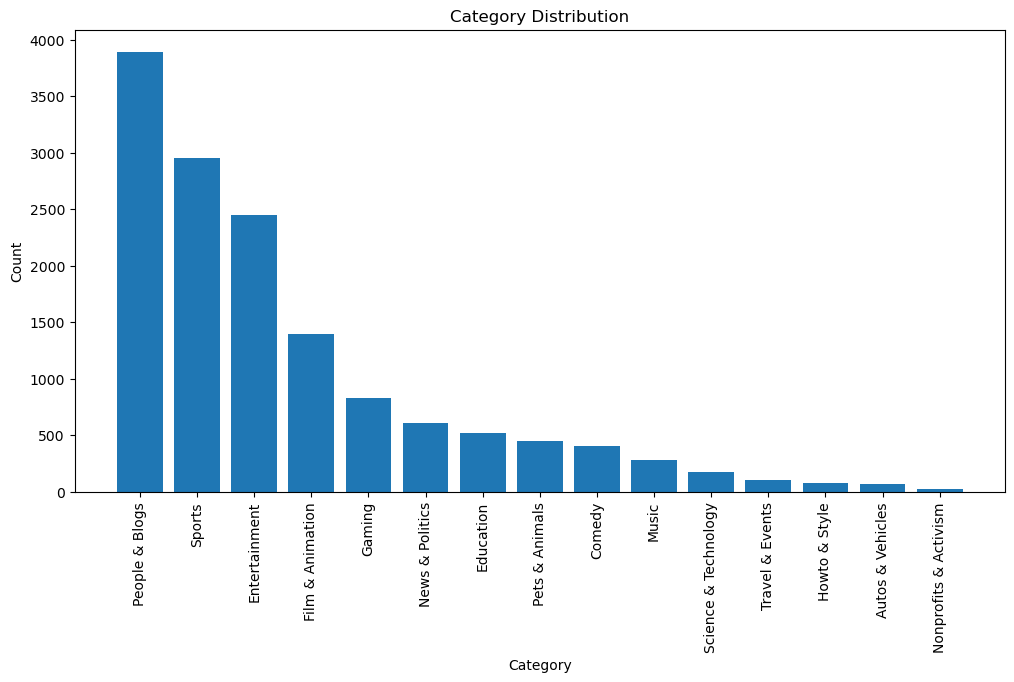

In [61]:
plt.figure(figsize=(12,6))
plt.bar(dataframe['category_name'].value_counts().index, dataframe['category_name'].value_counts().values)
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


<Axes: title={'center': 'Mean Likes per Category'}, xlabel='Category', ylabel='Mean Likes'>

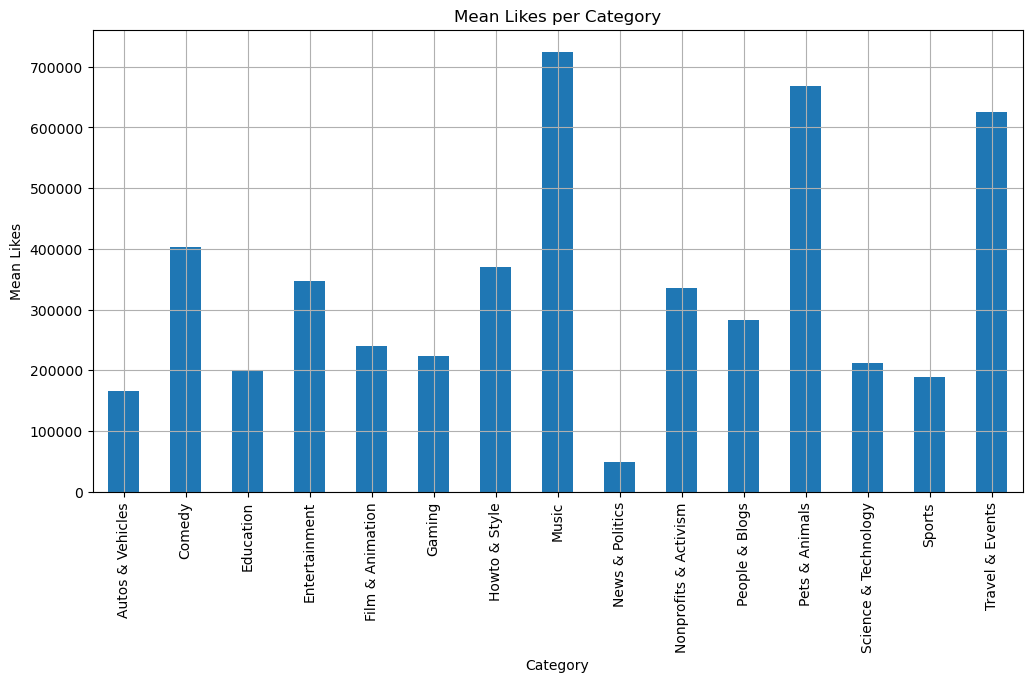

In [62]:
dataframe.groupby('category_name')['likes'].mean().plot(kind='bar', xlabel='Category', ylabel='Mean Likes', grid=1, title='Mean Likes per Category', figsize=(12,6))

<Axes: title={'center': 'Mean Views per Category'}, xlabel='Category', ylabel='Mean Views'>

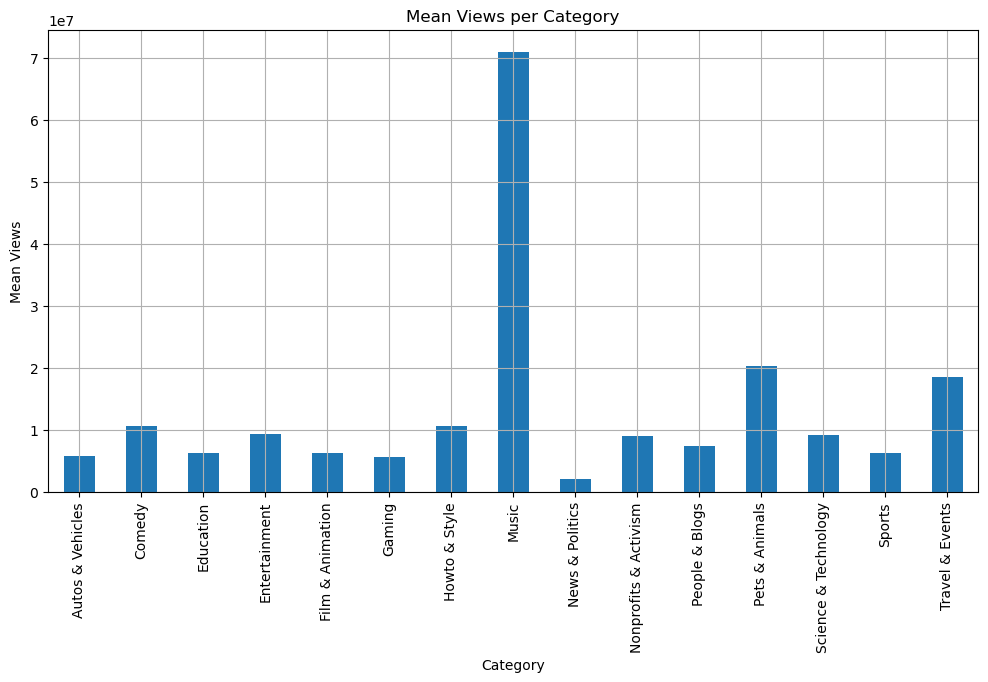

In [63]:
dataframe.groupby('category_name')['views'].mean().plot(kind='bar', xlabel='Category', ylabel='Mean Views', grid=1, title='Mean Views per Category', figsize=(12,6))

<Axes: >

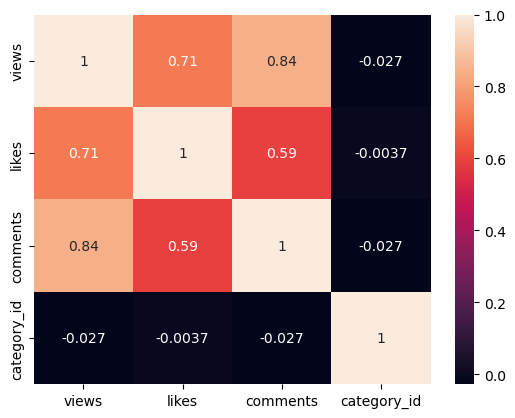

In [64]:
correlationMatrix = dataframe[['views', 'likes', 'comments', 'category_id']].corr()
sns.heatmap(correlationMatrix, annot=True)


In [65]:
def duration_convert(duration):
    if 'T' in duration:
        duration = duration.split('T')[1]
        if 'H' in duration:
            hours = duration.split('H')[0]
            duration = duration.split('H')[1]
        else: 
            hours = 0
        if 'M' in duration:
            minutes = duration.split('M')[0]
            duration = duration.split('M')[1]
        else:
            minutes = 0
        if 'S' in duration:
            seconds = duration.split('S')[0]
            duration = duration.split('S')[1]
        else:
            seconds = 0
        duration = int(hours)*3600 + int(minutes)*60 + int(seconds)
        duration = int(duration)
    
    else:
        duration = 0
        
    return duration

In [66]:
dataframe['duration_in_seconds'] = dataframe['duration'].apply(duration_convert)

<Axes: >

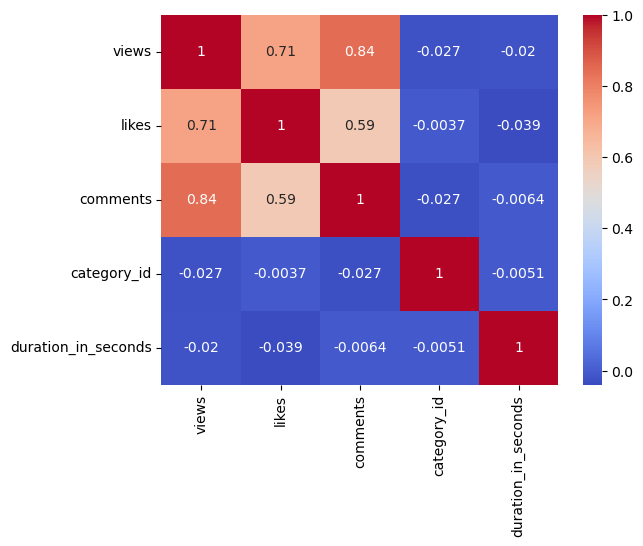

In [67]:
correlationMatrix = dataframe[['views', 'likes', 'comments', 'category_id', 'duration_in_seconds']].corr()
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm')

In [68]:
dataframe['published_at'] = pd.to_datetime(dataframe['published_at'])
dataframe['published_at'].head()

0   2024-08-14 19:30:06+00:00
1   2024-10-31 01:54:13+00:00
2   2024-12-01 04:17:32+00:00
3   2024-11-19 22:00:16+00:00
4   2024-11-30 14:00:05+00:00
Name: published_at, dtype: datetime64[ns, UTC]

In [69]:
dataframe['time_segment'] = dataframe['published_at'].dt.to_period('Q')

/var/folders/fg/9flc738d345c3sdd8tq2cln80000gn/T/ipykernel_43811/3420054008.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dataframe['time_segment'] = dataframe['published_at'].dt.to_period('Q')


In [70]:
# Group data by time segment and category
category_distribution = dataframe.groupby(['time_segment', 'category_name']).size().unstack(fill_value=0)

# Analyze mean duration and engagement metrics
engagement_metrics = dataframe.groupby('time_segment')[['duration_in_seconds', 'likes', 'views', 'comments']].mean()

In [72]:
watch_history = pd.read_csv('youtube_watch_history.csv')

In [73]:
for index, row in dataframe.iterrows():
    if row['video_id'] in watch_history['videoId'].values:
        dataframe.at[index, 'time'] = watch_history[watch_history['videoId'] == row['video_id']]['time'].values[0]
    
    

In [74]:
dataframe['time'] = pd.to_datetime(dataframe['time'], format = 'mixed')


In [75]:
dataframe['watched_time_segment'] = dataframe['time'].dt.to_period('Q')

/var/folders/fg/9flc738d345c3sdd8tq2cln80000gn/T/ipykernel_43811/526587368.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dataframe['watched_time_segment'] = dataframe['time'].dt.to_period('Q')


In [76]:
dataframe['watched_time_segment'].value_counts()

watched_time_segment
2024Q2    4784
2024Q3    4263
2024Q4    2781
2024Q1    1840
2023Q4     287
2023Q3     164
2023Q1      49
2023Q2      38
2022Q1      21
2022Q4       7
2022Q2       3
Freq: Q-DEC, Name: count, dtype: int64

# 1. HYPOTHESIS TESTING WITH CHI-SQUARE DISTRIBUTIONS


 H0: CATEGORIES THAT I HAVE WATCHED DOES NOT CHANGE SIGNIFICANTLY OVER TIME ON PERIODS OF QUARTERS
 
 H1: CATEGORIES THAT I HAVE WATCHED CHANGES SIGNIFICANTLY OVER TIME ON PERIODS OF QUARTERS


In [124]:
category_distribution = dataframe.groupby(['watched_time_segment', 'category_name']).size().unstack(fill_value=0)

<Axes: title={'center': 'Category Distribution Over Time'}, xlabel='watched_time_segment'>

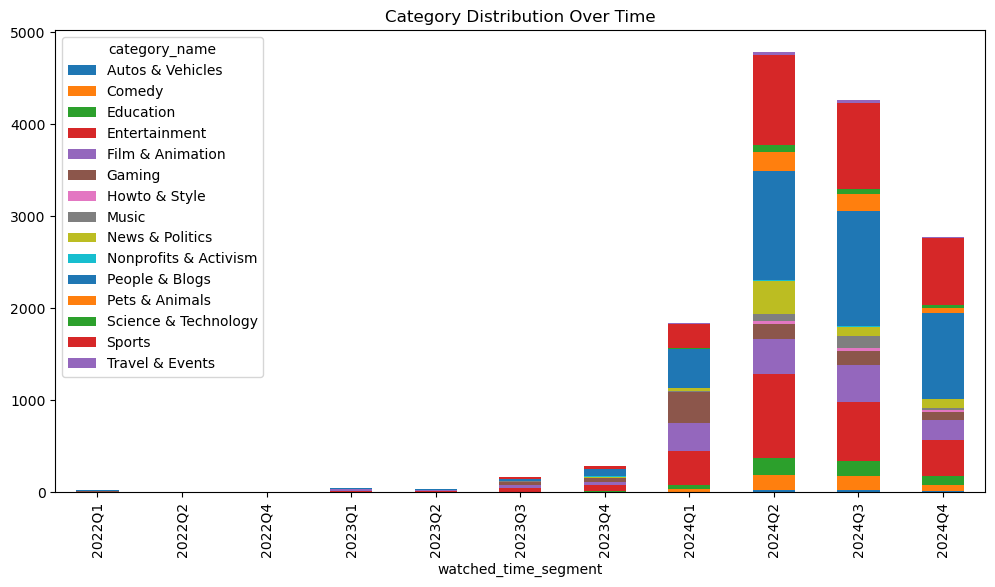

In [125]:
category_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), title='Category Distribution Over Time')



In [126]:
from scipy.stats import chi2_contingency

# Create a contingency table for categories and time segments
contingency_table = category_distribution.values

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square Statistic:", chi2)
print("p-value:", p)

# Interpret Results
if p < 0.05:
    print("Reject H₀: Significant changes in categories over time.")
else:
    print("Fail to Reject H₀: No significant changes in categories over time.")

Chi-square Statistic: 1890.4215622721597
p-value: 4.085316004471025e-304
Reject H₀: Significant changes in categories over time.


In [127]:
category_distribution = dataframe.groupby(['watched_time_segment', 'category_name']).size().unstack(fill_value=0).div(dataframe['watched_time_segment'].value_counts(), axis=0)

<Axes: title={'center': 'Category Distribution Over Time'}, xlabel='watched_time_segment'>

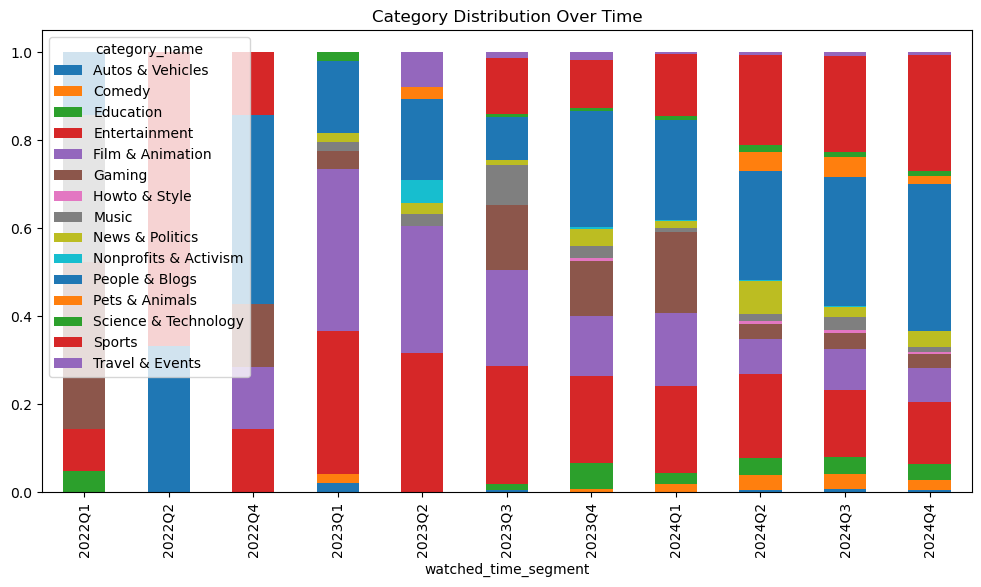

In [128]:
category_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), title='Category Distribution Over Time')

In [129]:
# Create a contingency table for categories and time segments
contingency_table = category_distribution.values

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square Statistic:", chi2)
print("p-value:", p)

# Interpret Results
if p < 0.05:
    print("Reject H₀: Significant changes in categories over time.")
else:
    print("Fail to Reject H₀: No significant changes in categories over time.")

Chi-square Statistic: 8.852728878908206
p-value: 1.0
Fail to Reject H₀: No significant changes in categories over time.



 H0: CATEGORIES THAT I HAVE WATCHED DOES NOT CHANGE SIGNIFICANTLY OVER TIME ON PERIODS OF MONTHS
 
 H1: CATEGORIES THAT I HAVE WATCHED CHANGES SIGNIFICANTLY OVER TIME ON PERIODS OF MONTHS

In [80]:
dataframe['watched_time_segment_in_months'] = dataframe['time'].dt.to_period('M')

/var/folders/fg/9flc738d345c3sdd8tq2cln80000gn/T/ipykernel_43811/3712485336.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dataframe['watched_time_segment_in_months'] = dataframe['time'].dt.to_period('M')


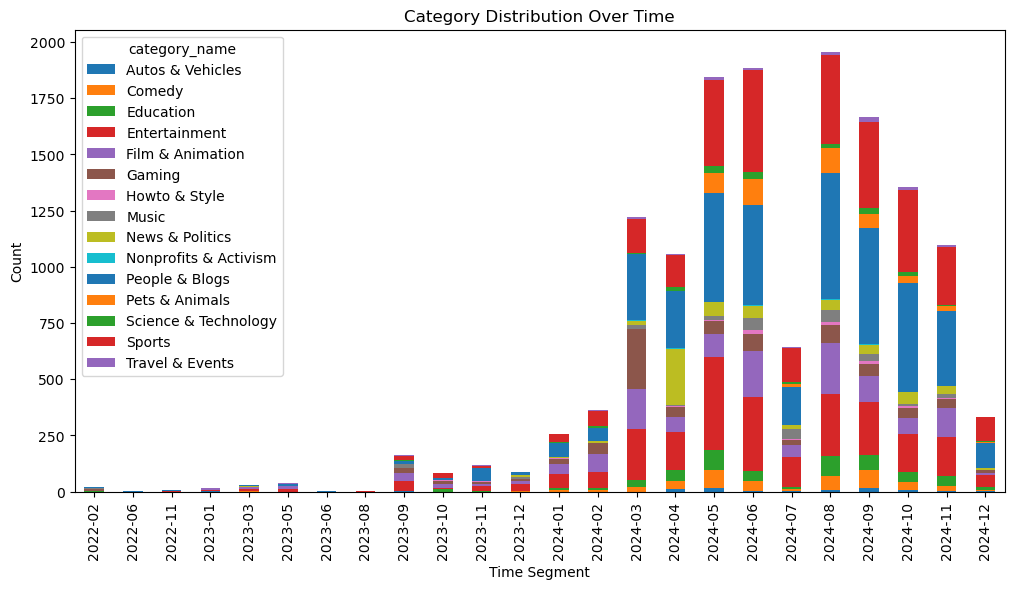

In [130]:
category_distribution = dataframe.groupby(['watched_time_segment_in_months', 'category_name']).size().unstack(fill_value=0)
# Plot category trends
category_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Category Distribution Over Time')
plt.ylabel('Count')
plt.xlabel('Time Segment')
plt.show()


In [131]:


# Create a contingency table for categories and time segments
contingency_table = category_distribution.values

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square Statistic:", chi2)
print("p-value:", p)

# Interpret Results
if p < 0.05:
    print("Reject H₀: Significant changes in categories over time.")
else:
    print("Fail to Reject H₀: No significant changes in categories over time.")

Chi-square Statistic: 3543.0437084108335
p-value: 0.0
Reject H₀: Significant changes in categories over time.


In [181]:
category_distribution = dataframe.groupby(['watched_time_segment_in_months', 'category_name']).size().unstack(fill_value=0).div(dataframe['watched_time_segment_in_months'].value_counts(), axis=0)

In [133]:
# Create a contingency table for categories and time segments
contingency_table = category_distribution.values

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square Statistic:", chi2)
print("p-value:", p)

# Interpret Results
if p < 0.05:
    print("Reject H₀: Significant changes in categories over time.")
else:
    print("Fail to Reject H₀: No significant changes in categories over time.")

Chi-square Statistic: 25.56337154041743
p-value: 1.0
Fail to Reject H₀: No significant changes in categories over time.


<Axes: title={'center': 'Category Distribution Over Time'}, xlabel='Time Segment', ylabel='Count'>

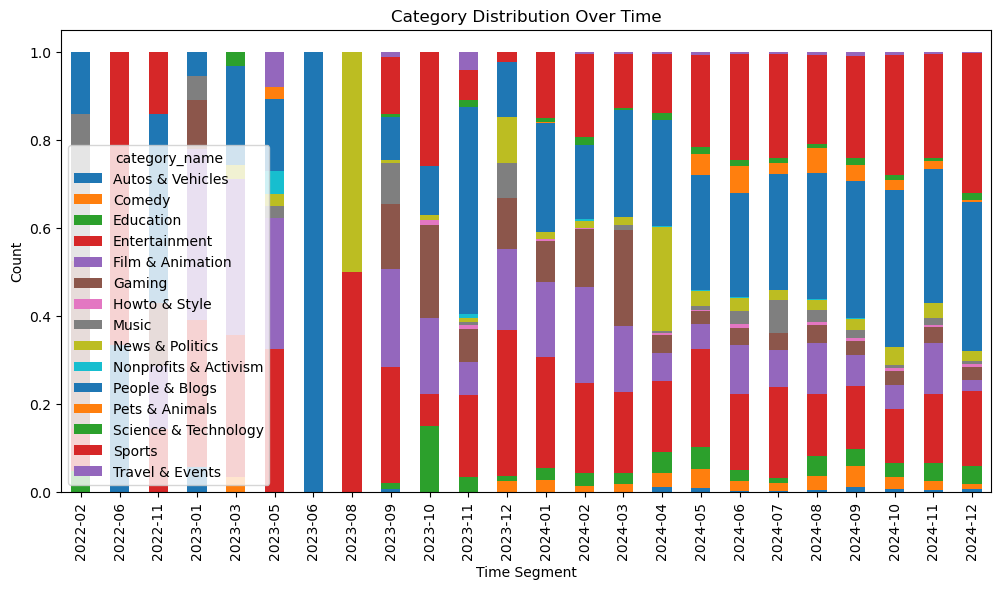

In [182]:
category_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), title='Category Distribution Over Time', xlabel='Time Segment', ylabel='Count')

CORRELATION MATRIX TO SEE IF THERE IS CORRELATION BETWEEN CATEGORY ID'S AND TIME

In [83]:
dataframe['watched_time_segment_in_months'].astype(int).tail()
dataframe['months'] = dataframe['watched_time_segment_in_months'].astype(int) - 625

In [82]:
dataframe['time_of_day'] = dataframe['time'].dt.hour

<Axes: >

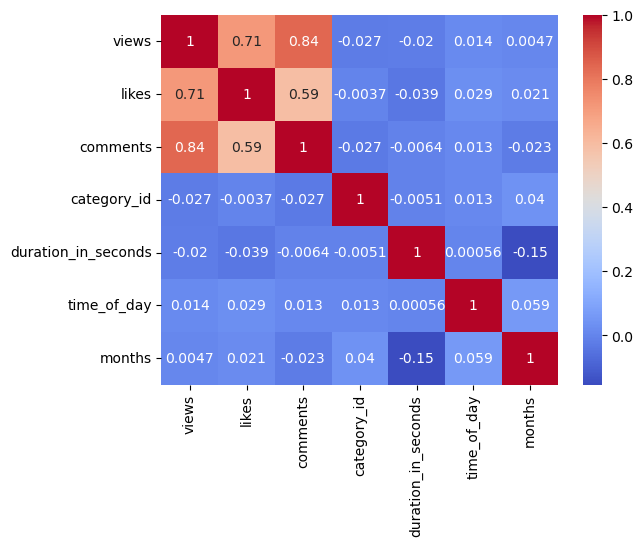

In [85]:
correlationMatrix = dataframe[['views', 'likes', 'comments', 'category_id', 'duration_in_seconds', 'time_of_day', 'months']].corr()

sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm')

H0: CATEGORIES THAT I HAVE WATCHED DOES NOT CHANGE SIGNIFICANLTY IN DIFFERENT TIMES IN A DAY

H1: CATEGORIES THAT I HAVE WATCHED CHANGES SIGNIFICANLTY IN DIFFERENT TIMES IN A DAY

/var/folders/fg/9flc738d345c3sdd8tq2cln80000gn/T/ipykernel_43811/2526585024.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_category_distribution = dataframe.groupby(['time_segment_in_day', 'category_name']).size().unstack(fill_value=0)


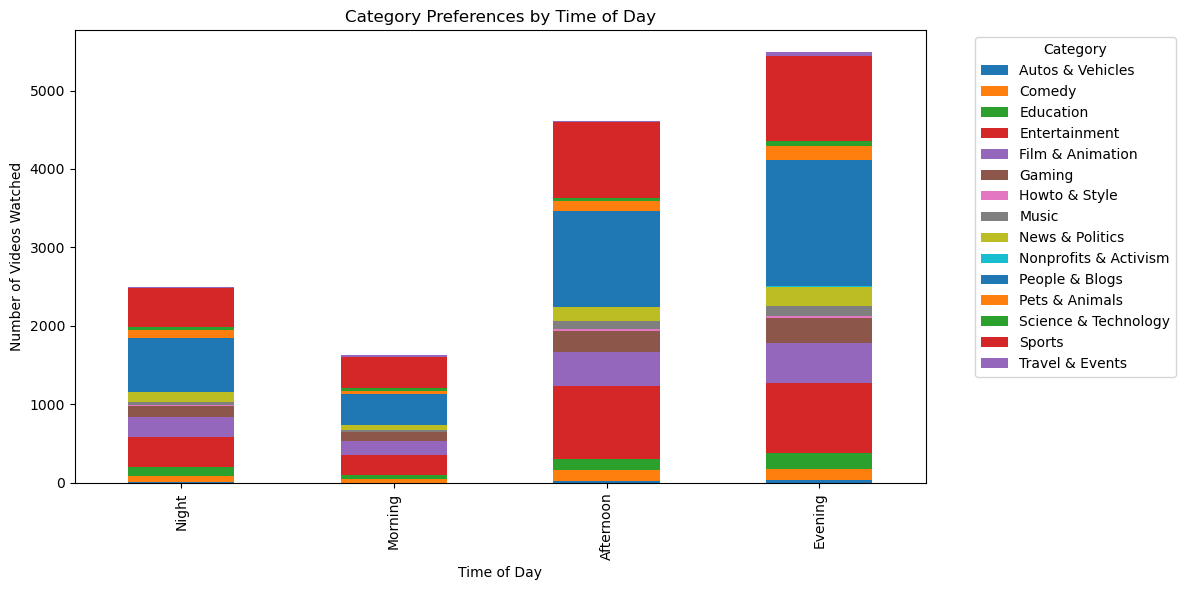

In [86]:

# Categorize time of day
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
dataframe['time_segment_in_day'] = pd.cut(dataframe['time_of_day'], bins=bins, labels=labels, right=False)

# Group by time segment and category
time_category_distribution = dataframe.groupby(['time_segment_in_day', 'category_name']).size().unstack(fill_value=0)

# Visualize category preferences by time of day
time_category_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Category Preferences by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Videos Watched')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [87]:
time_category_distribution

category_name,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Sports,Travel & Events
time_segment_in_day,,,,,,,,,,,,,,,
Night,11,77,117,378,262,139,13,37,127,2,679,107,34,505,12
Morning,4,47,52,257,179,106,6,24,66,1,395,38,32,402,19
Afternoon,23,142,141,924,439,272,23,101,171,9,1221,126,40,962,23
Evening,32,142,207,891,517,310,34,118,248,13,1600,178,67,1086,49


<Axes: title={'center': 'Category Preferences by Time of Day'}, xlabel='time_segment_in_day'>

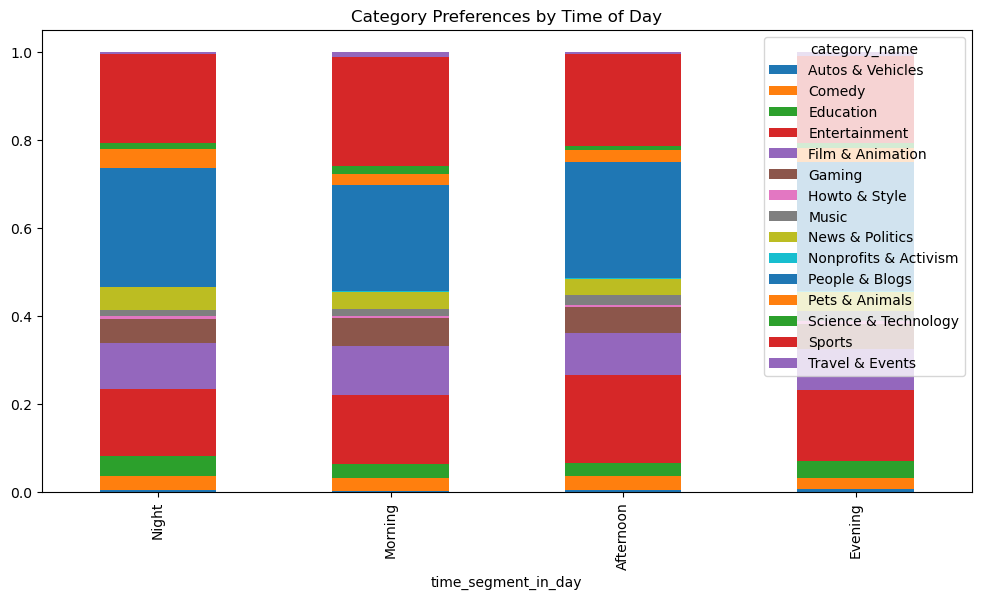

In [88]:
time_category_distribution.div(time_category_distribution.sum(axis=1), axis=0).plot(kind='bar', stacked=True, figsize=(12, 6), title='Category Preferences by Time of Day')

In [89]:
time_category_distribution.div(time_category_distribution.sum(axis=1), axis=0)

category_name,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Sports,Travel & Events
time_segment_in_day,,,,,,,,,,,,,,,
Night,0.004400,0.030800,0.046800,0.151200,0.104800,0.055600,0.005200,0.014800,0.050800,0.000800,0.271600,0.042800,0.013600,0.202000,0.004800
Morning,0.002457,0.028870,0.031941,0.157862,0.109951,0.065111,0.003686,0.014742,0.040541,0.000614,0.242629,0.023342,0.019656,0.246929,0.011671
Afternoon,0.004982,0.030756,0.030539,0.200130,0.095083,0.058913,0.004982,0.021876,0.037037,0.001949,0.264457,0.027290,0.008664,0.208360,0.004982
Evening,0.005827,0.025856,0.037691,0.162236,0.094137,0.056446,0.006191,0.021486,0.045157,0.002367,0.291333,0.032411,0.012200,0.197742,0.008922


In [135]:
# Create a contingency table for categories and time segments
contingency_table = time_category_distribution.values

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square Statistic:", chi2)
print("p-value:", p)

# Interpret Results
if p < 0.05:
    print("Reject H₀: Significant changes in categories over time.")
else:
    print("Fail to Reject H₀: No significant changes in categories over time.")

Chi-square Statistic: 147.90441914849924
p-value: 1.0232191065139721e-13
Reject H₀: Significant changes in categories over time.


In [136]:
# Create a contingency table for categories and time segments
contingency_table = time_category_distribution.div(time_category_distribution.sum(axis=1), axis=0).values

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square Statistic:", chi2)
print("p-value:", p)

# Interpret Results
if p < 0.05:
    print("Reject H₀: Significant changes in categories over time.")
else:
    print("Fail to Reject H₀: No significant changes in categories over time.")

Chi-square Statistic: 0.05241866727724565
p-value: 1.0
Fail to Reject H₀: No significant changes in categories over time.


# 2. ANOVA ANALYSIS TO TEST HOW NUMBER OF VIDEOS AND TOTAL DURATION OF VIDEOS CHANGES OVER TIME

In [137]:
dataframe['day'] = dataframe['time'].dt.day_name()

In [139]:
dataframe['day_date'] = dataframe['time'].dt.to_period('D')

/var/folders/fg/9flc738d345c3sdd8tq2cln80000gn/T/ipykernel_43811/1113538365.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dataframe['day_date'] = dataframe['time'].dt.to_period('D')


In [141]:
dataframe['day_date'].head()

0    2024-12-03
1    2024-12-03
2    2024-12-03
3    2024-12-03
4    2024-12-03
Name: day_date, dtype: period[D]

<Axes: title={'center': 'Video Count Dıstrubition by Time of Day'}, xlabel='day_date'>

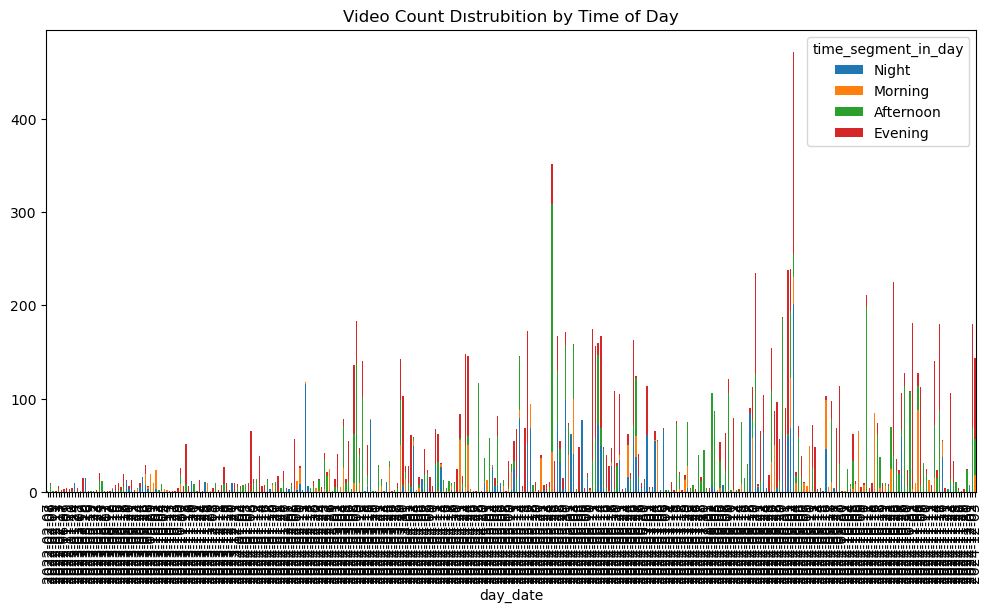

In [142]:
dataframe.groupby('day_date')['time_segment_in_day'].value_counts().unstack(fill_value=0).plot(kind='bar', stacked=True, figsize=(12, 6), title='Video Count Dıstrubition by Time of Day')

In [168]:
dataframe.groupby('day_date')['time_segment_in_day'].value_counts()

df = dataframe.groupby('day_date')['time_segment_in_day'].value_counts().unstack(fill_value=0)

In [169]:
df.reset_index(inplace=True)

In [170]:
df.drop(columns='day_date', inplace=True)
df


time_segment_in_day,Night,Morning,Afternoon,Evening
0,0,0,0,1
1,0,0,8,2
2,0,0,1,0
3,0,0,0,1
4,0,0,3,3
...,...,...,...,...
338,0,0,0,3
339,0,0,23,2
340,4,0,3,0
341,0,0,69,111


In [160]:
from scipy.stats import f_oneway
night = df['Night']
morning = df['Morning']
afternoon = df['Afternoon']
evening = df['Evening']
# Perform ANOVA
f_stat, p_value = f_oneway(night, morning, afternoon, evening)

# Display results
print("F-statistic:", f_stat)
print("P-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject H₀: Significant difference in the number of videos watched across time segments.")
else:
    print("Fail to Reject H₀: No significant difference in the number of videos watched across time segments.")

F-statistic: 15.32908994007226
P-value: 8.19646920958926e-10
Reject H₀: Significant difference in the number of videos watched across time segments.


<Axes: title={'center': 'Video Counts in Time of Day Distribution'}, xlabel='time_segment_in_day'>

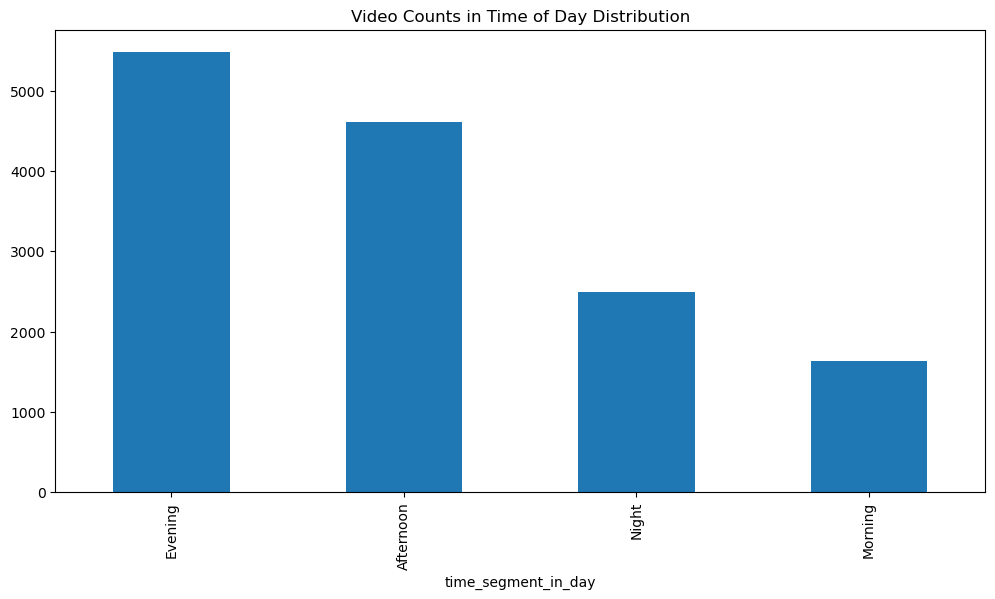

In [161]:
dataframe['time_segment_in_day'].value_counts().plot(kind='bar', figsize=(12, 6), title='Video Counts in Time of Day Distribution')

In [162]:
from scipy.stats import levene


# Perform Levene's test
stat, p_value = levene(night, morning, afternoon, evening)

# Display Results
print("Levene's Test Statistic:", stat)
print("P-value:", p_value)

# Interpret Results
if p_value < 0.05:
    print("Reject H₀: Variances are not equal (homogeneity of variances violated).")
else:
    print("Fail to Reject H₀: Variances are equal (homogeneity of variances satisfied).")

Levene's Test Statistic: 14.608448060941123
P-value: 2.2828391865976753e-09
Reject H₀: Variances are not equal (homogeneity of variances violated).


In [183]:
df_duration = dataframe.pivot_table(index='day_date', columns='time_segment_in_day', values='duration_in_seconds', aggfunc='sum').reset_index()



/var/folders/fg/9flc738d345c3sdd8tq2cln80000gn/T/ipykernel_43811/1286266936.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_duration = dataframe.pivot_table(index='day_date', columns='time_segment_in_day', values='duration_in_seconds', aggfunc='sum').reset_index()


In [184]:
df_duration.drop(columns='day_date', inplace=True)
df_duration

time_segment_in_day,Night,Morning,Afternoon,Evening
0,0,0,0,13366
1,0,0,85033,2086
2,0,0,152,0
3,0,0,0,22
4,0,0,10902,1551
...,...,...,...,...
338,0,0,0,5681
339,0,0,7517,2783
340,17250,0,2945,0
341,0,0,20152,7551


/var/folders/fg/9flc738d345c3sdd8tq2cln80000gn/T/ipykernel_43811/1656073696.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataframe.groupby('time_segment_in_day')['duration_in_seconds'].sum().plot(kind='bar', figsize=(12, 6), title='Total Duration in Time of Day Distribution')


<Axes: title={'center': 'Total Duration in Time of Day Distribution'}, xlabel='time_segment_in_day'>

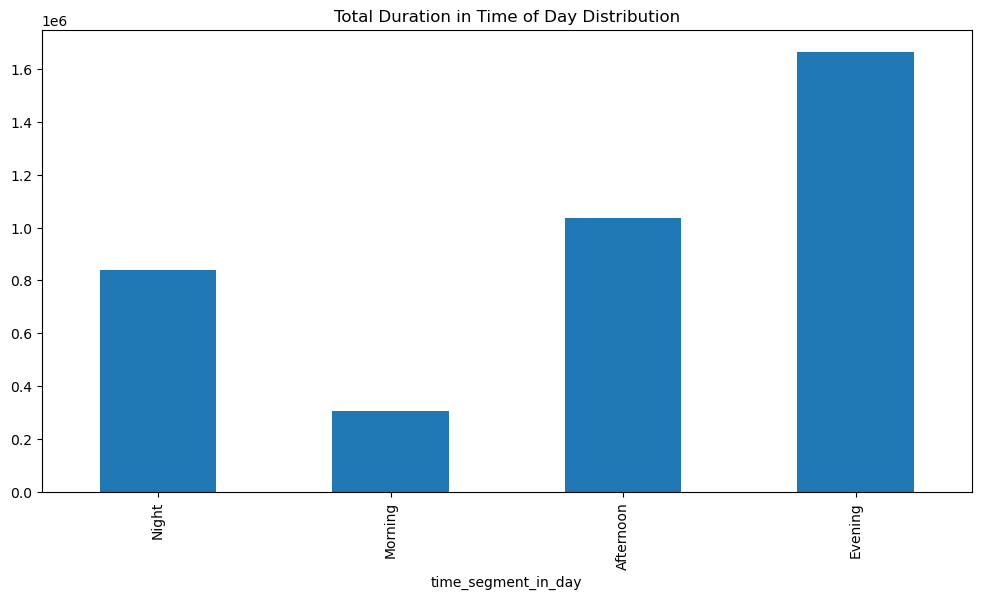

In [186]:
dataframe['time_segment_in_day'].value_counts().plot(kind='bar', figsize=(12, 6), title='Video Counts in Time of Day Distribution')
dataframe.groupby('time_segment_in_day')['duration_in_seconds'].sum().plot(kind='bar', figsize=(12, 6), title='Total Duration in Time of Day Distribution')

In [178]:
night_dur = df_duration['Night']
morning_dur = df_duration['Morning']
afternoon_dur = df_duration['Afternoon']
evening_dur = df_duration['Evening']

f_stat, p_value = f_oneway(night_dur, morning_dur, afternoon_dur, evening_dur)
# Display results
print("F-statistic:", f_stat)
print("P-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject H₀: Significant difference in the total duration of videos watched across time segments.")
else:
    print("Fail to Reject H₀: No significant difference in the total duration of videos watched across time segments.")


F-statistic: 17.823746728376346
P-value: 2.37603277134661e-11
Reject H₀: Significant difference in the total duration of videos watched across time segments.


In [179]:
from scipy.stats import levene


# Perform Levene's test
stat, p_value = levene(night_dur, morning_dur, afternoon_dur, evening_dur)

# Display Results
print("Levene's Test Statistic:", stat)
print("P-value:", p_value)

# Interpret Results
if p_value < 0.05:
    print("Reject H₀: Variances are not equal (homogeneity of variances violated).")
else:
    print("Fail to Reject H₀: Variances are equal (homogeneity of variances satisfied).")

Levene's Test Statistic: 16.569240801672716
P-value: 1.408314364243147e-10
Reject H₀: Variances are not equal (homogeneity of variances violated).


# KRUSKAL-WALLIS TEST

In [163]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test
stat, p_value = kruskal(night, morning, afternoon, evening)

# Display Results
print("Kruskal-Wallis Test Statistic:", stat)
print("P-value:", p_value)

# Interpret Results
if p_value < 0.05:
    print("Reject H₀: Significant differences between groups.")
else:
    print("Fail to Reject H₀: No significant differences between groups.")

Kruskal-Wallis Test Statistic: 134.3159946058513
P-value: 6.351178286735975e-29
Reject H₀: Significant differences between groups.


In [180]:
# Perform Kruskal-Wallis test
stat, p_value = kruskal(night_dur, morning_dur, afternoon_dur, evening_dur)

# Display Results
print("Kruskal-Wallis Test Statistic:", stat)
print("P-value:", p_value)

# Interpret Results
if p_value < 0.05:
    print("Reject H₀: Significant differences between groups.")
else:
    print("Fail to Reject H₀: No significant differences between groups.")

Kruskal-Wallis Test Statistic: 164.62177014578307
P-value: 1.8434655029707574e-35
Reject H₀: Significant differences between groups.
